<a href="https://colab.research.google.com/github/edlawit12/Data110--Fall2025/blob/main/week_7_HW_Palmers_penguins_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 7 HW: Palmers penguins

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins_clean = penguins.dropna()


1) Scatterplot with regression line: Example- Bill lenght vs Flipper length

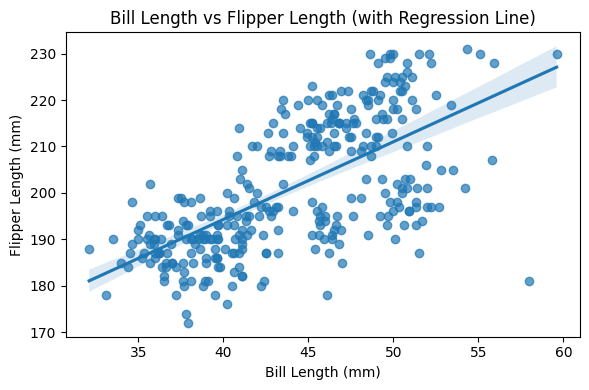

In [2]:
plt.figure(figsize=(6, 4))

sns.regplot(
    data=penguins_clean,
    x="bill_length_mm",
    y="flipper_length_mm",
    scatter_kws={"alpha": 0.7}
)

plt.title("Bill Length vs Flipper Length (with Regression Line)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.tight_layout()
plt.show()


2) Three sub- scatterplots with Regression lines, split by species

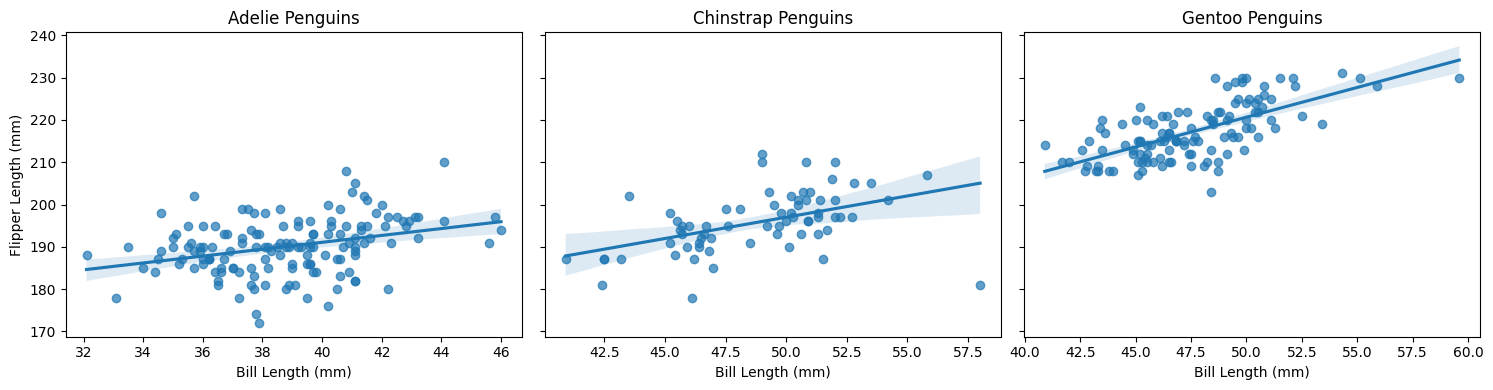

In [3]:
species_list = penguins_clean["species"].unique()

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, sp in enumerate(species_list):
    subset = penguins_clean[penguins_clean["species"] == sp]
    sns.regplot(
        data=subset,
        x="bill_length_mm",
        y="flipper_length_mm",
        ax=axes[i],
        scatter_kws={"alpha": 0.7}
    )
    axes[i].set_title(f"{sp} Penguins")
    axes[i].set_xlabel("Bill Length (mm)")
    if i == 0:
        axes[i].set_ylabel("Flipper Length (mm)")
    else:
        axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


Pairplot Remix

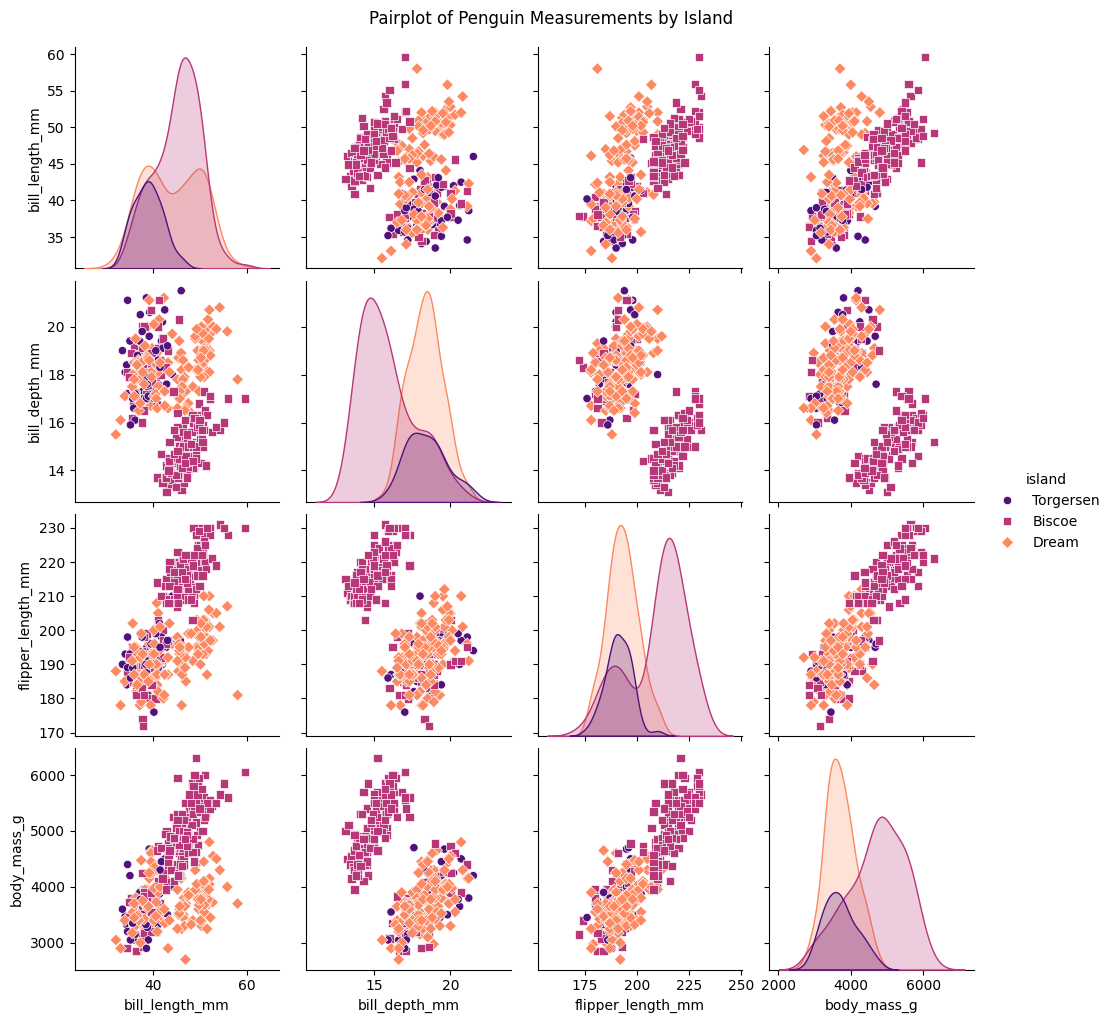

In [4]:
# Columns we’ll use
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
cols_for_pairplot = num_cols + ["island"]

penguins_pp = penguins.dropna(subset=cols_for_pairplot)

sns.pairplot(
    data=penguins_pp,
    vars=num_cols,
    hue="island",          # different hue than species
    markers=["o", "s", "D"],
    palette="magma",
    diag_kind="kde",
    corner=False           # show full grid; you can set True if you want half
)
plt.suptitle("Pairplot of Penguin Measurements by Island", y=1.02)
plt.show()


4) 2×2 Grid with Mixed Plot Types (Bar, Scatter, Hist, Box)

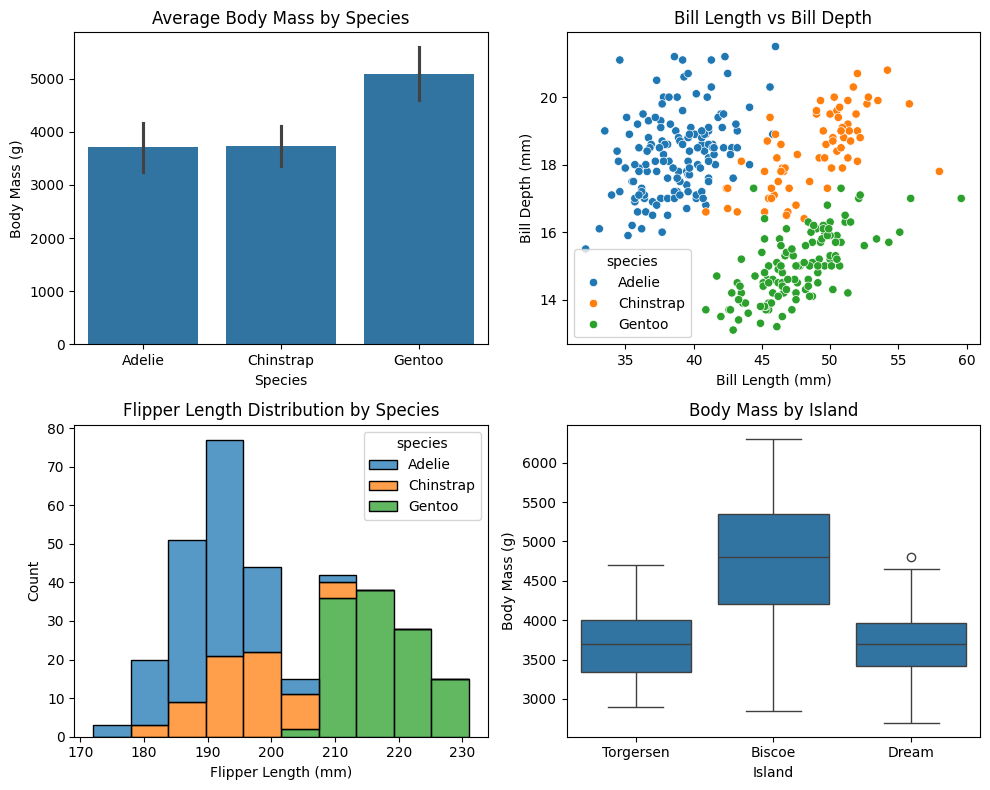

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Top-left: Bar plot - body mass by species
sns.barplot(
    data=penguins_clean,
    x="species",
    y="body_mass_g",
    ax=axes[0, 0],
    estimator="mean",
    errorbar="sd"
)
axes[0, 0].set_title("Average Body Mass by Species")
axes[0, 0].set_xlabel("Species")
axes[0, 0].set_ylabel("Body Mass (g)")

# Top-right: Scatter plot - bill length vs bill depth, colored by species
sns.scatterplot(
    data=penguins_clean,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Bill Length vs Bill Depth")
axes[0, 1].set_xlabel("Bill Length (mm)")
axes[0, 1].set_ylabel("Bill Depth (mm)")

sns.histplot(
    data=penguins_clean,
    x="flipper_length_mm",
    hue="species",
    multiple="stack",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Flipper Length Distribution by Species")
axes[1, 0].set_xlabel("Flipper Length (mm)")
axes[1, 0].set_ylabel("Count")

sns.boxplot(
    data=penguins_clean,
    x="island",
    y="body_mass_g",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Body Mass by Island")
axes[1, 1].set_xlabel("Island")
axes[1, 1].set_ylabel("Body Mass (g)")

plt.tight_layout()

plt.savefig("penguins_2x2_grid.png", dpi=150)

plt.show()


5) Pie chart- Distribution of Penguin Species

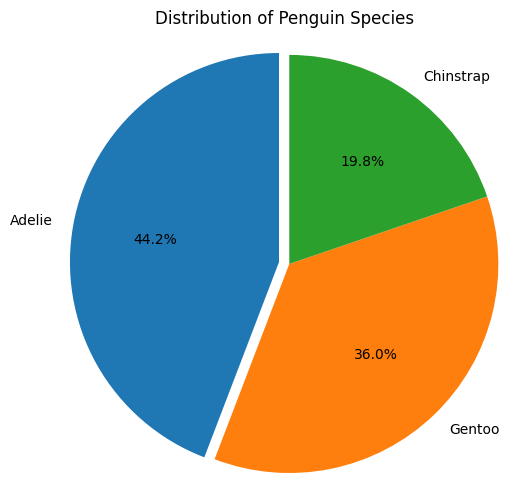

In [6]:
species_counts = penguins["species"].value_counts()

plt.figure(figsize=(6, 6))

explode = [0.05] + [0] * (len(species_counts) - 1)

plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    explode=explode
)

plt.title("Distribution of Penguin Species")
plt.axis("equal")
plt.show()
